In [1]:
import os
import numpy as np
from PIL import Image
import cv2
def load_images_from_folder(folder):
    images = []
    labels = []
    for label in os.listdir(folder):
        label_folder = os.path.join(folder, label)
        if os.path.isdir(label_folder):
            for filename in os.listdir(label_folder):
                img_path = os.path.join(label_folder, filename)
                with Image.open(img_path) as img:
                    img_gray = img.convert('L')  # Convert to grayscale
                    images.append(np.array(img_gray))
                    labels.append(label)
    images = np.array(images)
    labels = np.array(labels)
    return images, labels

train_images, train_labels = load_images_from_folder('train')


In [2]:
n_samples = len(train_images)
data = train_images.reshape((n_samples, -1))


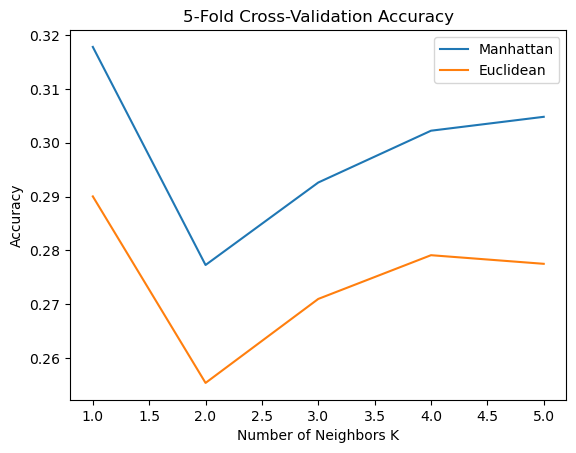

In [3]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

# Define the range of K
k_values = range(1, 6)  # testing K from 1 to 5
scores_l1 = []
scores_l2 = []

for k in k_values:
    # L1 distance (Manhattan)
    knn_l1 = KNeighborsClassifier(n_neighbors=k, p=1)
    scores_l1.append(np.mean(cross_val_score(knn_l1, data, train_labels, cv=5)))

    # L2 distance (Euclidean)
    knn_l2 = KNeighborsClassifier(n_neighbors=k, p=2)
    scores_l2.append(np.mean(cross_val_score(knn_l2, data, train_labels, cv=5)))

import matplotlib.pyplot as plt

plt.plot(k_values, scores_l1, label='Manhattan')
plt.plot(k_values, scores_l2, label='Euclidean')
plt.xlabel('Number of Neighbors K')
plt.ylabel('Accuracy')
plt.title('5-Fold Cross-Validation Accuracy')
plt.legend()
plt.show()
